In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np

image shape: (410, 615, 3)


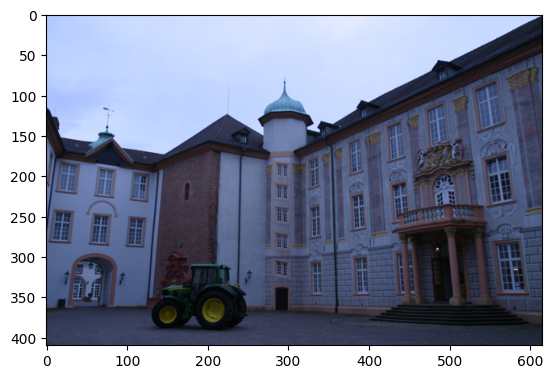

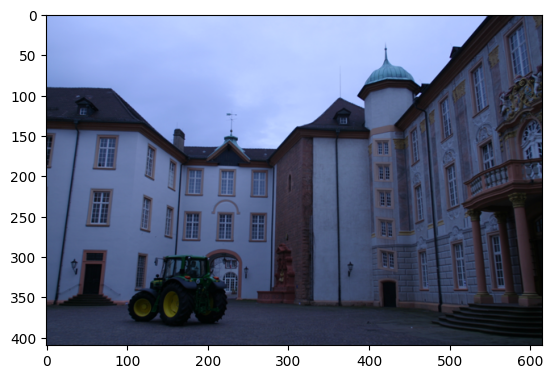

In [3]:
# load the images
im_left = cv2.imread('../data/0014_2.png')
print("image shape:", im_left.shape)
plt.imshow(im_left[:, :, ::-1])
plt.figure()
im_right = cv2.imread('../data/0017_2.png')
plt.imshow(im_right[:, :, ::-1])
images = [im_left, im_right]

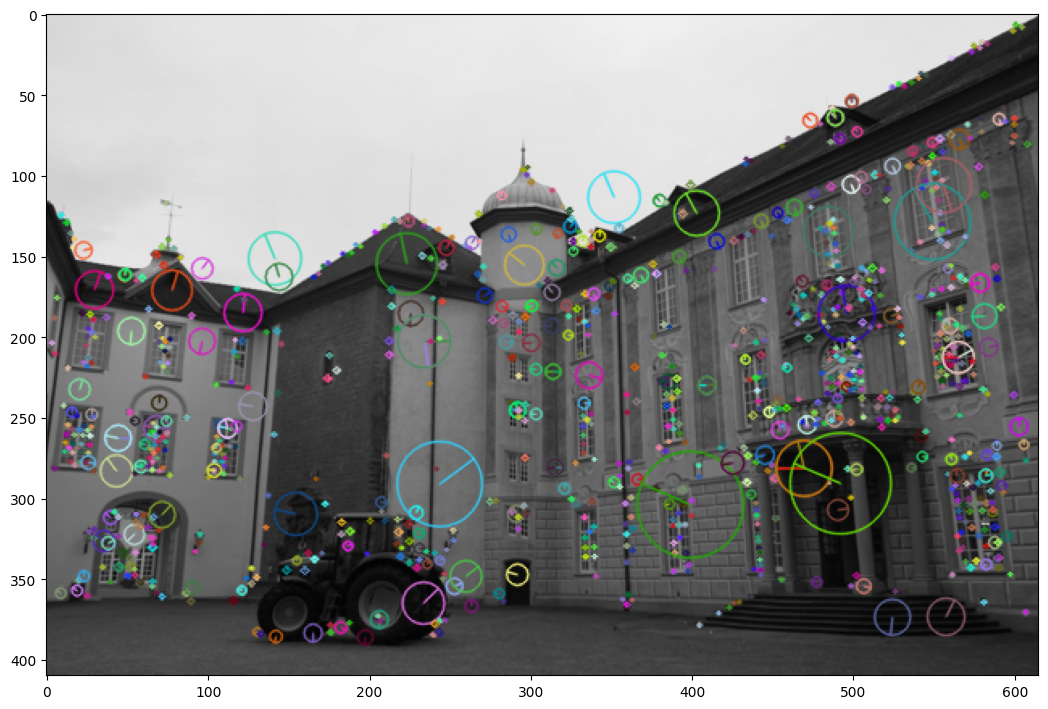

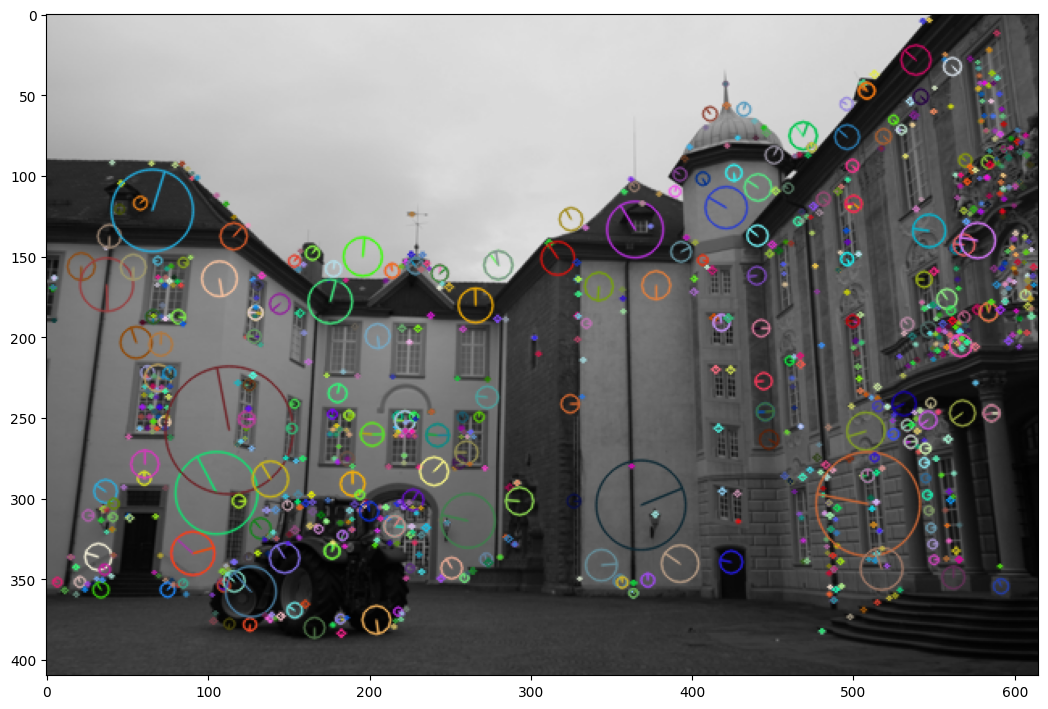

In [4]:
""" Detects SIFT features in all of the images
"""
keypoints = []
descriptions = []
for im in images:
  gray= cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

  sift = cv2.xfeatures2d.SIFT_create()
  kp, des = sift.detectAndCompute(gray,None)

  keypoints.append(kp)
  descriptions.append(des)

  plt.figure(figsize=(6.4*2, 4.8*2))
  out_im = cv2.drawKeypoints(gray,kp, gray, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  plt.imshow(out_im)

num matches 393


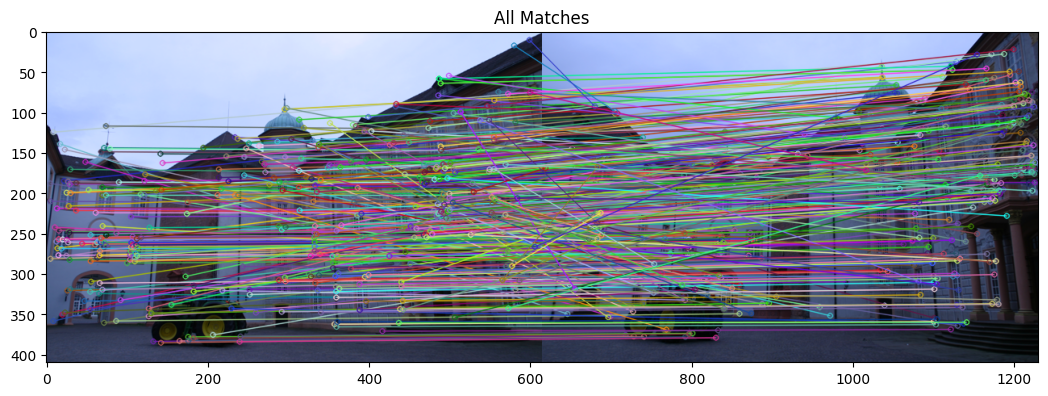

In [5]:
""" Matches the detected keypoints between the images
"""

bf = cv2.BFMatcher(crossCheck=True)
matches = bf.match(descriptions[0], descriptions[1])

print("num matches", len(matches))


matched_image = cv2.drawMatches(images[0][:, :, ::-1], keypoints[0], images[1][:, :, ::-1], keypoints[1], matches, None, flags=2)
plt.figure(figsize=(6.4*2, 4.8*2))
plt.title("All Matches")
plt.imshow(matched_image)


In [6]:
""" Compute calibrated coordinates
"""

# For the satsok castle images
f1 = f2 = 552
u0 = 307.5
v0 = 205

K = np.array([[f1, 0, u0],
              [0, f2, v0],
              [0, 0, 1]])


uncalibrated_1 = [[keypoints[0][match.queryIdx].pt[0], keypoints[0][match.queryIdx].pt[1], 1] for match in matches]
uncalibrated_2 = [[keypoints[1][match.trainIdx].pt[0], keypoints[1][match.trainIdx].pt[1], 1] for match in matches]

uncalibrated_1 = np.array(uncalibrated_1).T
uncalibrated_2 = np.array(uncalibrated_2).T

k_inv = np.linalg.inv(K)

calibrated_1 = np.matmul(k_inv, uncalibrated_1).T
calibrated_2 = np.matmul(k_inv, uncalibrated_2).T


In [18]:
from lse import least_squares_estimation

E_least = least_squares_estimation(calibrated_1, calibrated_2)
print("E least", E_least)

E least [[ 0.03483464  0.19532636  0.00230723]
 [ 0.12138734  0.96929545 -0.08251168]
 [-0.48165932 -0.00994682 -0.8760465 ]]


In [24]:
inliers.shape

(385, 1)

In [31]:
[i for i in inliers]

[array([388]),
 array([40]),
 array([265]),
 array([195]),
 array([352]),
 array([64]),
 array([6]),
 array([90]),
 array([211]),
 array([193]),
 array([377]),
 array([241]),
 array([177]),
 array([358]),
 array([218]),
 array([280]),
 array([35]),
 array([311]),
 array([181]),
 array([81]),
 array([5]),
 array([8]),
 array([270]),
 array([63]),
 array([279]),
 array([121]),
 array([51]),
 array([21]),
 array([189]),
 array([65]),
 array([87]),
 array([145]),
 array([235]),
 array([70]),
 array([72]),
 array([347]),
 array([310]),
 array([100]),
 array([383]),
 array([14]),
 array([183]),
 array([239]),
 array([135]),
 array([28]),
 array([221]),
 array([207]),
 array([268]),
 array([254]),
 array([60]),
 array([125]),
 array([294]),
 array([272]),
 array([76]),
 array([320]),
 array([324]),
 array([332]),
 array([382]),
 array([343]),
 array([302]),
 array([344]),
 array([43]),
 array([288]),
 array([78]),
 array([327]),
 array([85]),
 array([249]),
 array([148]),
 array([61]),
 array

In [29]:
type(matches), len(matches)

(tuple, 393)

In [30]:
matches[0]

< cv2.DMatch 0000024A8FE42C70>

E_ransac [[ 0.00240025  0.07852295 -0.02252064]
 [-0.52963389 -0.01934081  0.84772158]
 [ 0.11732375 -0.98877012  0.0487032 ]]
Num inliers (191,)


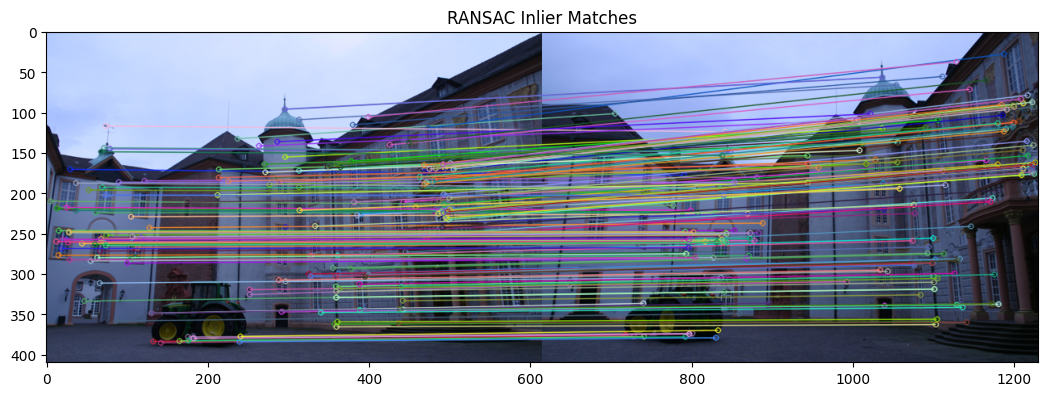

In [60]:
from ransac import ransac_estimator

# running this cell will take a while!!!

E_ransac, inliers = ransac_estimator(calibrated_1, calibrated_2)
print("E_ransac", E_ransac)
print("Num inliers", inliers.shape)

inlier_matches = [matches[i] for i in inliers]

matched_image = cv2.drawMatches(images[0][:, :, ::-1],
                                keypoints[0],
                                images[1][:, :, ::-1],
                                keypoints[1],
                                inlier_matches, None, flags=2)
plt.figure(figsize=(6.4*2, 4.8*2))
plt.title("RANSAC Inlier Matches")
plt.imshow(matched_image)

E_ransac [[ 0.00240025  0.07852295 -0.02252064]
 [-0.52963389 -0.01934081  0.84772158]
 [ 0.11732375 -0.98877012  0.0487032 ]]
Num inliers (191,)


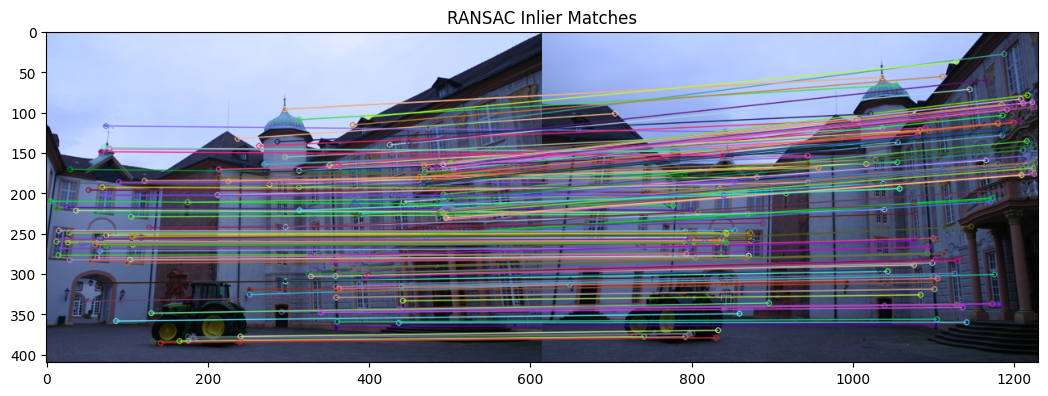

In [75]:
### vectorized inmplementation
from ransac import ransac_estimator

# running this cell will take a while!!!

E_ransac, inliers = ransac_estimator(calibrated_1, calibrated_2)
print("E_ransac", E_ransac)
print("Num inliers", inliers.shape)

inlier_matches = [matches[i] for i in inliers]

matched_image = cv2.drawMatches(images[0][:, :, ::-1],
                                keypoints[0],
                                images[1][:, :, ::-1],
                                keypoints[1],
                                inlier_matches, None, flags=2)
plt.figure(figsize=(6.4*2, 4.8*2))
plt.title("RANSAC Inlier Matches")
plt.imshow(matched_image)

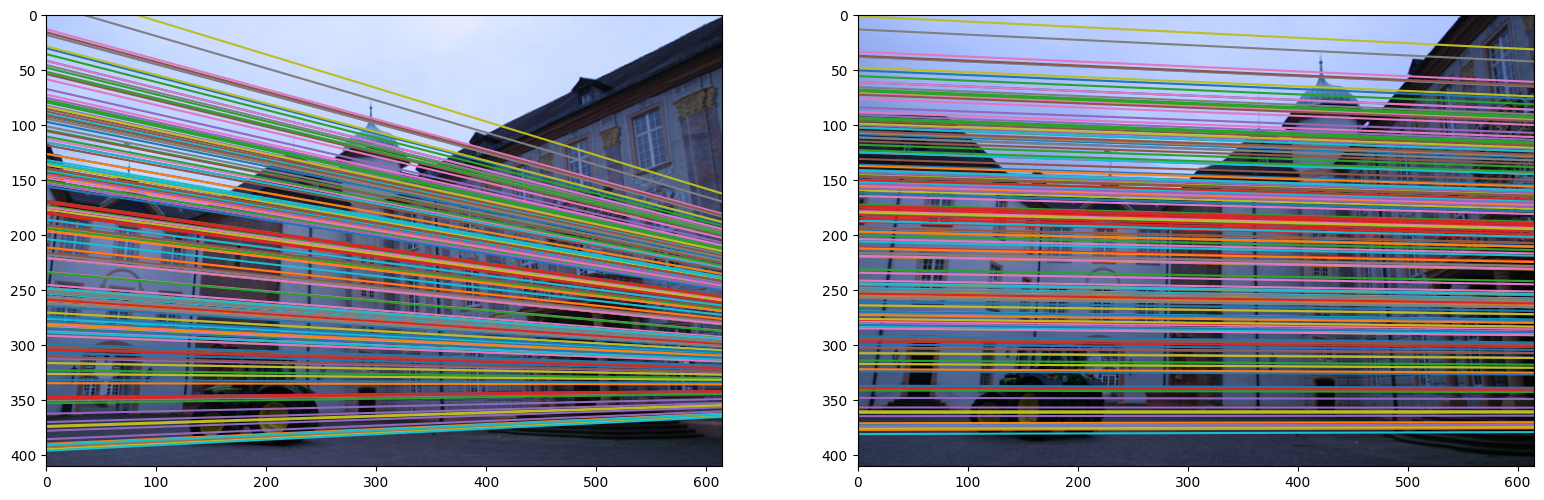

In [79]:
from plot_epi import plot_epipolar_lines

uncalibrated_inliers_1 = [[keypoints[0][match.queryIdx].pt[0], keypoints[0][match.queryIdx].pt[1], 1] for match in inlier_matches]
uncalibrated_inliers_2 = [[keypoints[1][match.trainIdx].pt[0], keypoints[1][match.trainIdx].pt[1], 1] for match in inlier_matches]
uncalibrated_inliers_1 = np.array(uncalibrated_inliers_1).T
uncalibrated_inliers_2 = np.array(uncalibrated_inliers_2).T

plot_epipolar_lines(images[0], images[1], uncalibrated_inliers_1, uncalibrated_inliers_2, E_ransac, K)

In [112]:
from pose import pose_candidates_from_E

transform_candidates = pose_candidates_from_E(E_ransac)
print("transform_candidates", transform_candidates)
for c in transform_candidates:
  print(np.linalg.det(c['R']))

np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]]).T

transform_candidates [{'T': array([-0.99665501, -0.02195462, -0.07871969]), 'R': array([[ 0.79299139,  0.14543831,  0.59161842],
       [ 0.13518577, -0.98888489,  0.06189902],
       [ 0.594045  ,  0.03089301, -0.80383839]])}, {'T': array([-0.99665501, -0.02195462, -0.07871969]), 'R': array([[ 0.88152822,  0.10506717,  0.46029218],
       [-0.09829894,  0.9944031 , -0.03872721],
       [-0.46178493, -0.01110711,  0.88692238]])}, {'T': array([0.99665501, 0.02195462, 0.07871969]), 'R': array([[ 0.79299139,  0.14543831,  0.59161842],
       [ 0.13518577, -0.98888489,  0.06189902],
       [ 0.594045  ,  0.03089301, -0.80383839]])}, {'T': array([0.99665501, 0.02195462, 0.07871969]), 'R': array([[ 0.88152822,  0.10506717,  0.46029218],
       [-0.09829894,  0.9944031 , -0.03872721],
       [-0.46178493, -0.01110711,  0.88692238]])}]
0.9999999999999998
0.9999999999999999
0.9999999999999998
0.9999999999999999


array([[ 0,  1,  0],
       [-1,  0,  0],
       [ 0,  0,  1]])

In [113]:
def plot_reconstruction(P1, P2, T, R):
  P1trans = (R @ P1.T).T + T

  plt.figure(figsize=(6.4*2, 4.8*2))
  ax = plt.axes()
  ax.set_xlabel('x')
  ax.set_ylabel('z')

  for i in range(P1.shape[0]):
    plt.plot([0, P2[i, 0]], [0, P2[i, 2]], 'bs-')
    plt.plot([T[0], P1trans[i, 0]], [T[2], P1trans[i, 2]], 'ro-')
  plt.plot([0], [0], 'bs')
  plt.plot([T[0]], [T[2]], 'ro')

In [114]:
from recon3d import reconstruct3D 

P1, P2, T, R = reconstruct3D(transform_candidates, calibrated_1, calibrated_2)

plot_reconstruction(P1, P2, T, R)

best 1 (393,)
best 370 (393,)
not best 0
not best 22


In [138]:
from show_reproj import show_reprojections

show_reprojections(images[0], images[1], uncalibrated_1, uncalibrated_2, P1, P2, K, T, R)